**Telecom *X* - Análise de Evasão de Clientes**

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu papel é:

✅ Importar e manipular dados de uma API de forma eficiente.

✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.

✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.

✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.


#📌 Extracão

Para iniciar sua análise, você precisará importar os dados da **API da Telecom X**. Esses dados estão disponíveis no formato **JSON** e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

In [57]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Dados estão no formato JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df= pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [59]:
cols_to_normalize = ['customer', 'phone', 'internet', 'account']


# Cria uma lista de DataFrames normalizados
normalized_dfs = [pd.json_normalize(df[col]).add_prefix(f'{col}_') for col in cols_to_normalize]

# Une tudo ao DataFrame original (sem as colunas antigas)
df_final = pd.concat([df.drop(columns=cols_to_normalize)] + normalized_dfs, axis=1)
df_final

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

Essa etapa ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.

✅ Explorar as colunas do dataset e verificar seus tipos de dados.

✅ Consultar o dicionário para entender melhor os significados das variáveis.

✅ Identificar as colunas mais relevantes para a análise de evasão.

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [61]:
# Exibe os valores únicos de cada coluna e até 50 valores diferentes
for col in df_final.columns:
  print(f'{col}: {df_final[col].unique()}')
  if df_final[col].nunique() < 50:
    print(df_final[col].unique())
    print('-' * 50)

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
['No' 'Yes' '']
--------------------------------------------------
customer_gender: ['Female' 'Male']
['Female' 'Male']
--------------------------------------------------
customer_SeniorCitizen: [0 1]
[0 1]
--------------------------------------------------
customer_Partner: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer_Dependents: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
phone_MultipleLines: ['No' 'Yes' 'No phone service']
['No' 'Yes' 'No phone service']
------

In [62]:
# Verificar duplicatas
print("Numero de duplicados", df_final.duplicated().sum())

Numero de duplicados 0


In [63]:
#Verificar Nº Nulos
print("Numero de Nulos \n", df_final.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [64]:
#contagem de células vazias
df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [65]:
# Transfomandos dados numericos
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

In [66]:
# Verifcandos linhas
df_final= df_final[df_final['Churn'].str.strip() != '']
print("Número de linhas depois de eliminar as vazias em 'Churn':", len(df_final))

Número de linhas depois de eliminar as vazias em 'Churn': 7043


In [67]:
df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [68]:
print("Numero de Nulos \n", df_final.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges.Monthly       0
account_Charges.Total        11
dtype: int64


In [69]:
df_final = df_final.dropna(subset=['account_Charges.Total'])

In [70]:
print("Numero de Nulos \n", df_final.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [71]:
# Criando Colunas conta_custos_diarios
df_final['account_Charges.Daily'] = df_final['account_Charges.Monthly'] / 30

In [72]:
# Depois reorganize as colunas
colunas = list(df_final.columns)
colunas.remove('account_Charges.Daily')
colunas.insert(19, 'account_Charges.Daily')
df_final = df_final[colunas]

In [73]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [74]:
# Renomeando e padronizando colunas
rename_colunas = {                                                                # Dicionário com os novos nomes das colunas.
    'customerID': 'id_cliente',
    'Churn': 'cancelamento',
    'customer_gender': 'cliente_genero',
    'customer_SeniorCitizen': 'cliente_idoso',
    'customer_Partner': 'cliente_parceiro',
    'customer_Dependents': 'cliente_dependentes',
    'customer_tenure': 'cliente_tempo_contrato',
    'phone_PhoneService': 'telefone_servico',
    'phone_MultipleLines': 'telefone_multiplas_linhas',
    'internet_InternetService': 'internet_servico',
    'internet_OnlineSecurity': 'internet_seguranca_online',
    'internet_OnlineBackup': 'internet_backup_online',
    'internet_DeviceProtection': 'internet_protecao_dispositivo',
    'internet_TechSupport': 'internet_suporte_tecnico',
    'internet_StreamingTV': 'internet_streaming_tv',
    'internet_StreamingMovies': 'internet_streaming_filmes',
    'account_Contract': 'conta_contrato',
    'account_PaperlessBilling': 'conta_fatura_digital',
    'account_PaymentMethod': 'conta_metodo_pagamento',
    'account_Charges.Daily' : 'conta_custos_diarios',
    'account_Charges.Monthly': 'conta_custos_mensais',
    'account_Charges.Total': 'conta_custos_totais'
}
df_final = df_final.rename(columns=rename_colunas)

In [75]:
df_final.head()

,id_cliente,cancelamento,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_contrato,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_digital,conta_metodo_pagamento,conta_custos_diarios,conta_custos_mensais,conta_custos_totais
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.9,267.40


In [76]:
# Vericando nomes das colunas atualizadas
df_final.columns

Index(['id_cliente', 'cancelamento', 'cliente_genero', 'cliente_idoso',
       'cliente_parceiro', 'cliente_dependentes', 'cliente_tempo_contrato',
       'telefone_servico', 'telefone_multiplas_linhas', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'internet_streaming_tv', 'internet_streaming_filmes', 'conta_contrato',
       'conta_fatura_digital', 'conta_metodo_pagamento',
       'conta_custos_diarios', 'conta_custos_mensais', 'conta_custos_totais'],
      dtype='object')

In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7032 non-null   object 
 1   cancelamento                   7032 non-null   object 
 2   cliente_genero                 7032 non-null   object 
 3   cliente_idoso                  7032 non-null   int64  
 4   cliente_parceiro               7032 non-null   object 
 5   cliente_dependentes            7032 non-null   object 
 6   cliente_tempo_contrato         7032 non-null   int64  
 7   telefone_servico               7032 non-null   object 
 8   telefone_multiplas_linhas      7032 non-null   object 
 9   internet_servico               7032 non-null   object 
 10  internet_seguranca_online      7032 non-null   object 
 11  internet_backup_online         7032 non-null   object 
 12  internet_protecao_dispositivo  7032 non-null   object

In [78]:
# convertendo valores textuais como "Sim" e "Não" em valores binários (1 e 0)
colunas_numericas = [
    'cancelamento',
    'cliente_parceiro',
    'cliente_dependentes',
    'telefone_servico',
    'telefone_multiplas_linhas',
    'internet_protecao_dispositivo',
    'internet_suporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_filmes',
    'conta_fatura_digital'
]

for col in colunas_numericas:
   df_final[col] = (df_final[col].str.strip().str.lower().map({'yes': 1, 'no': 0, 'sim': 1, 'não': 0}))

In [79]:
df_final.head(3)

,id_cliente,cancelamento,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_contrato,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_digital,conta_metodo_pagamento,conta_custos_diarios,conta_custos_mensais,conta_custos_totais
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,2.463333,73.9,280.85


In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7032 non-null   object 
 1   cancelamento                   7032 non-null   int64  
 2   cliente_genero                 7032 non-null   object 
 3   cliente_idoso                  7032 non-null   int64  
 4   cliente_parceiro               7032 non-null   int64  
 5   cliente_dependentes            7032 non-null   int64  
 6   cliente_tempo_contrato         7032 non-null   int64  
 7   telefone_servico               7032 non-null   int64  
 8   telefone_multiplas_linhas      6352 non-null   float64
 9   internet_servico               7032 non-null   object 
 10  internet_seguranca_online      7032 non-null   object 
 11  internet_backup_online         7032 non-null   object 
 12  internet_protecao_dispositivo  5512 non-null   float6

#📊 Carga e análise

- Carga (Load): os dados já tratados e transformados são carregados para um ambiente de destino — geralmente um Data Warehouse, Data Lake ou sistema analítico.
- Análise (Analysis): uma vez disponíveis nesse ambiente, os dados são explorados por meio de consultas, relatórios, dashboards e modelos estatísticos ou de machine learning, com o objetivo de gerar insights e apoiar a tomada de decisão.


o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes.

In [81]:
# Análise Descritiva dos dados
df_final.describe().round(2)

,cancelamento,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_contrato,telefone_servico,telefone_multiplas_linhas,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_fatura_digital,conta_custos_diarios,conta_custos_mensais,conta_custos_totais
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.0,6352.00,5512.00,5512.00,5512.00,5512.0,7032.00,7032.00,7032.00,7032.00
mean,0.27,0.16,0.48,0.30,32.42,0.9,0.47,0.44,0.37,0.49,0.5,0.59,2.16,64.80,2283.30
std,0.44,0.37,0.50,0.46,24.55,0.3,0.50,0.50,0.48,0.50,0.5,0.49,1.00,30.09,2266.77
min,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.61,18.25,18.80
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.0,0.00,1.19,35.59,401.45
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.0,1.00,2.34,70.35,1397.48
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,3.00,89.86,3794.74
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,3.96,118.75,8684.80


In [82]:
df_final[['cliente_tempo_contrato', 'conta_custos_diarios','conta_custos_mensais', 'conta_custos_totais']].describe().round(2)

,cliente_tempo_contrato,conta_custos_diarios,conta_custos_mensais,conta_custos_totais
count,7032.00,7032.00,7032.00,7032.00
mean,32.42,2.16,64.80,2283.30
std,24.55,1.00,30.09,2266.77
min,1.00,0.61,18.25,18.80
25%,9.00,1.19,35.59,401.45
50%,29.00,2.34,70.35,1397.48
75%,55.00,3.00,89.86,3794.74
max,72.00,3.96,118.75,8684.80


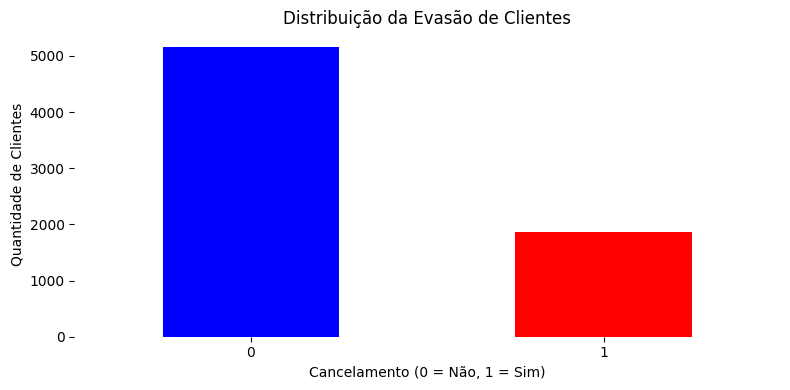

In [83]:
# Gráfico de barras da Distribuição da Evasão de Clientes
plt.figure(figsize=(8, 4))
# Conta os valores
contagem = df_final['cancelamento'].value_counts()

# Mapeia cores: 0 → azul, 1 → vermelho
mapa_cores = {0: 'blue', 1: 'red'}

# Cria o gráfico
contagem.plot(
    kind='bar',
    color=[mapa_cores[idx] for idx in contagem.index]
)
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.xticks (rotation=0)

# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

plt.show()

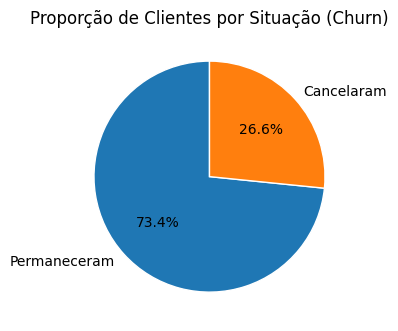

In [84]:
# Gráfico de pizza do churn
cancelamento_cliente = df_final['cancelamento'].value_counts(normalize=True).round(3) * 100

# Contagem dos clientes por churn
labels = ['Permaneceram', 'Cancelaram']
sizes = [
    cancelamento_cliente.get(0, 0),
    cancelamento_cliente.get(1, 0)
]

plt.figure(figsize=(4, 5))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={
        'linewidth': 1,
        'edgecolor': 'white'
    }
)

plt.title('Proporção de Clientes por Situação (Cancelamento)')
plt.tight_layout()
plt.show()

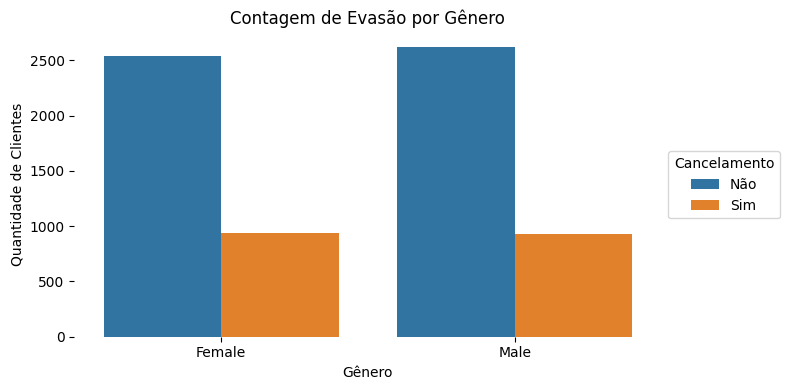

In [85]:
# Gráfico de evasão por gênero
plt.figure(figsize=(8, 4))
sns.countplot(x='cliente_genero', hue='cancelamento', data=df_final)
plt.title('Contagem de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],loc='center left', bbox_to_anchor=(1, 0.5))
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
plt.show()

In [86]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7032 non-null   object 
 1   cancelamento                   7032 non-null   int64  
 2   cliente_genero                 7032 non-null   object 
 3   cliente_idoso                  7032 non-null   int64  
 4   cliente_parceiro               7032 non-null   int64  
 5   cliente_dependentes            7032 non-null   int64  
 6   cliente_tempo_contrato         7032 non-null   int64  
 7   telefone_servico               7032 non-null   int64  
 8   telefone_multiplas_linhas      6352 non-null   float64
 9   internet_servico               7032 non-null   object 
 10  internet_seguranca_online      7032 non-null   object 
 11  internet_backup_online         7032 non-null   object 
 12  internet_protecao_dispositivo  5512 non-null   float6

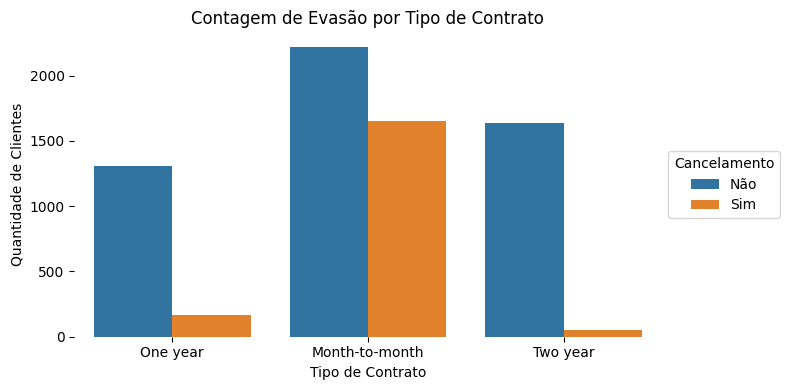

In [87]:
# Gráfico de evasão por tipo de contrato.
plt.figure(figsize=(8, 4))
sns.countplot(x='conta_contrato', hue='cancelamento', data=df_final)
plt.title('Contagem de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'], loc='center left', bbox_to_anchor=(1, 0.5))
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
plt.show()

In [88]:
df_final['conta_contrato'].value_counts()

,count
conta_contrato,
Month-to-month,3875
Two year,1685
One year,1472


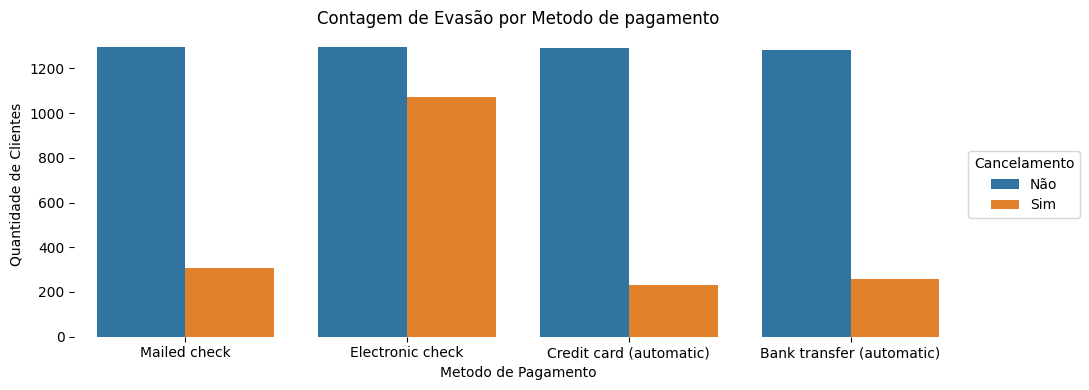

In [89]:
# Gráfico de evasão por método de pagamento.
plt.figure(figsize=(11, 4))
sns.countplot(x='conta_metodo_pagamento', hue='cancelamento', data=df_final)
plt.title('Contagem de Evasão por Metodo de pagamento')
plt.xlabel('Metodo de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],
           loc='center left', bbox_to_anchor=(1, 0.5))
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [90]:
df_final['conta_metodo_pagamento'].value_counts()

,count
conta_metodo_pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


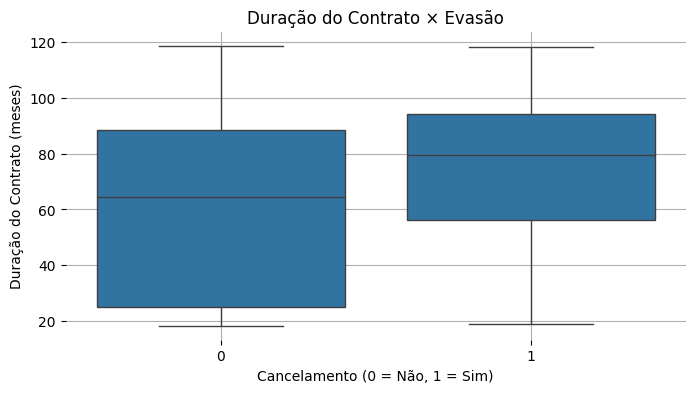

In [91]:
#Gráfico de Boxplot - Duração do Contrato x Evasão
plt.figure(figsize=(8, 4))
sns.boxplot(x='cancelamento', y='conta_custos_mensais', data=df_final)
plt.title('Duração do Contrato × Evasão')
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')
plt.ylabel('Duração do Contrato (meses)')
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.grid(True)
plt.show()

In [92]:
df_final['conta_custos_mensais'].describe().round(2)

,conta_custos_mensais
count,7032.00
mean,64.80
std,30.09
min,18.25
25%,35.59
50%,70.35
75%,89.86
max,118.75


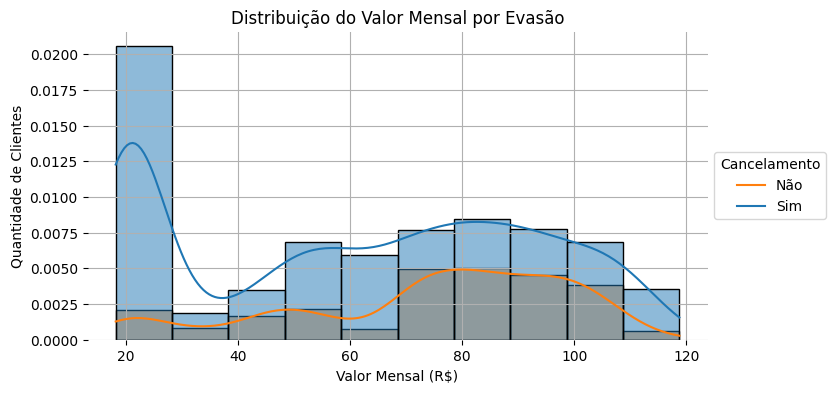

In [93]:
# Histograma dos custos mensais por evasão.
plt.figure(figsize=(8, 4))
sns.histplot(data=df_final, x='conta_custos_mensais', hue='cancelamento', bins=10,
             kde=True, stat='density')
plt.title('Distribuição do Valor Mensal por Evasão')
plt.xlabel('Valor Mensal (R$)')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

In [94]:
df_final['conta_custos_mensais'].describe()

,conta_custos_mensais
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


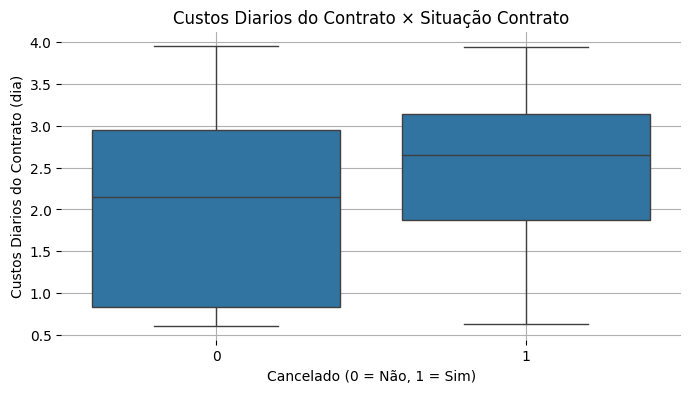

In [98]:
#Gráfico de Boxplot - Custos Diarios do Contrato (Dia) x Cancelamento
plt.figure(figsize=(8, 4))
sns.boxplot(x='cancelamento', y='conta_custos_diarios', data=df_final)
plt.title('Custos Diarios do Contrato × Situação Contrato')
plt.xlabel('Cancelado (0 = Não, 1 = Sim)')
plt.ylabel('Custos Diarios do Contrato (dia)')
# Remove bordas para visual limpo
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.grid(True)
plt.show()

#📄Relatorio Final

# Relatório de Análise de Evasão de Clientes (Churn)

## 📌 Introdução
O objetivo desta análise foi compreender os fatores que influenciam a evasão de clientes (churn) em uma base de dados de telecomunicações. O churn representa um dos maiores desafios para empresas de serviços, pois impacta diretamente na receita e na sustentabilidade do negócio. Identificar padrões e variáveis associadas ao cancelamento é essencial para criar estratégias de retenção mais eficazes.

---

## 🧹 Limpeza e Tratamento de Dados
- Importação dos dados originais.
- Padronização de tipos de variáveis (numéricas e categóricas).
- Remoção de espaços em branco e valores inconsistentes.
- Tratamento de valores nulos e duplicados.
- Conversão de colunas para formatos adequados (ex.: custos mensais e custos anuais).

---

## 📊 Análise Exploratória de Dados
Foram realizadas diversas análises e visualizações para identificar padrões de churn:

- **Distribuição do cancelamento**: proporção de clientes que permaneceram vs. cancelaram.
- **Gênero**: não apresentou impacto significativo na evasão.
- **Tipo de contrato**: contratos mensais tiveram maior taxa de cancelamento.
- **Método de pagamento**: pagamentos manuais (cheque eletrônico) apresentaram maior churn.
- **Custos mensais**: clientes com valores acima de R$ 70,00 cancelaram mais.
- **Duração de contratos**: clientes que tem contrato mensal tendem a cancelatem mais que os contratos de 1 ano ou 2 anos.
- **Custos Diarios**: cclientes com valores diarios maiores tendem a cancelaram com mais frequência.

---

## 🔍 Principais Insights Consolidados
1. **Tempo de contrato** é o maior indicador de churn — a evasão ocorre principalmente nos primeiros meses.  
2. **Tipo de contrato** impacta diretamente a retenção — contratos mensais têm maior churn.  
3. **Preço** é um gatilho de cancelamento — valores acima de R$ 70,00 aumentam o risco.  
4. **Serviços adicionais** funcionam como retentores — segurança online, suporte prioritário e telefonia reduzem churn.  
5. **Forma de pagamento** influencia diretamente — métodos automáticos reduzem evasão.  
6. **Perfil familiar e engajamento** — clientes com dependentes permanecem mais tempo.  
7. **Gênero** não é determinante — evasão ocorre de forma equilibrada entre homens e mulheres.  

---

## 📈 Conclusões
A análise demonstrou que a evasão de clientes está fortemente associada a fatores contratuais, financeiros e de engajamento, especialmente nos primeiros meses de relacionamento. O churn ocorre majoritariamente entre clientes com contratos mensais, valores elevados e ausência de serviços adicionais, indicando falhas na percepção de valor e no processo de onboarding.

---

## 🎯 Recomendações Estratégicas
- **Retenção inicial (Onboarding):** criar ações específicas nos primeiros 90 dias (boas-vindas, check-ins, benefícios iniciais).  
- **Fidelização contratual:** incentivar a migração de contratos mensais para planos mais longos com benefícios claros.  
- **Estratégia de preço:** reforçar benefícios em planos acima de R$ 70,00 para aumentar o valor percebido.  
- **Serviços agregados:** oferecer pacotes com segurança online, suporte prioritário e telefonia como padrão.  
- **Pagamentos:** incentivar métodos automáticos com descontos ou benefícios.  

---

## 💡 Encerramento
**Os dados mostram que reduzir o churn não depende apenas de preço, mas de criar valor percebido, reduzir atritos e fortalecer o relacionamento com o cliente desde o início da jornada.**

 👉[Linkedin](https://www.linkedin.com/in/souleosantos/)